# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Ahmad Fadhil]
- **Email:** [afadhil2512@Gmail.com]
- **ID Dicoding:** [ahmad_fadhil25]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
Bagaimana pengaruh cuaca (weathersit) dan musim (season) terhadap jumlah total penyewaan sepeda (cnt)? Apakah terdapat pola tertentu yang menunjukkan kapan penyewaan meningkat atau menurun berdasarkan faktor lingkungan ini?
- Pertanyaan 2
Bila melihat berdasarkan jam, apakah ada pola tertentu? Seperti jam berapa terpadat dan terlonggar?


## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import streamlit as st
import seaborn as sns



## Data Wrangling

### Gathering Data

In [2]:
day_df=pd.read_csv("day.csv")
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df=pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data Berhasil di upload kedalam directory


### Assessing Data

In [4]:
#Pengecekan tipe data
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

**Insight:**
- Setelah Pengecekan data ternyata tidak terjadi tipe data yang salah dan kita bisa melanjutkan ketahapan cleaning data.

### Cleaning Data

In [ ]:
#Pengecekan Missing Value
print("Missing values di hour_df:")
print(hour_df.isnull().sum())

print("\nMissing values di day_df:")
print(day_df.isnull().sum())

Missing values di hour_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing values di day_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [17]:
#fungsi ini untuk melakukan cek apakah terdapat duplikasi atau tidak
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [18]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())


Jumlah duplikasi:  0


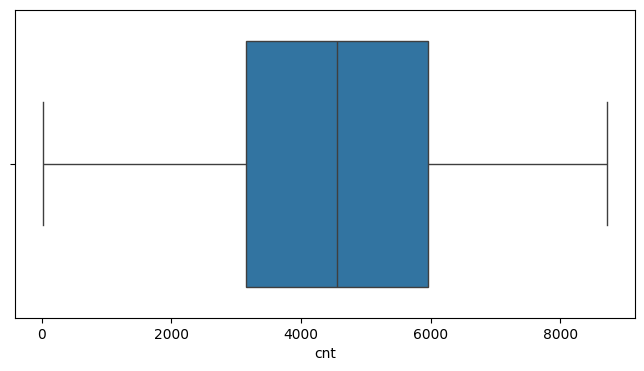

In [ ]:
#fungsi kode dibawah untuk mendeteksi apakah ada outlier atau tidak menggunakan library mathplotlib dan seabornplt.figure(figsize=(8,4))
sns.boxplot(x=day_df['cnt'])
plt.show()
#output kode ini akan memunculkan tampilah visualisasi box-plot

**Insight:**
- Setelah dilakuakan pengecekan Missing value, jumlah duplikasi ternyata data tersebut terlihat aman dan siap diolah ketahapan selanjutnya.

## Exploratory Data Analysis (EDA)

In [8]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


### Explore ...

In [9]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [11]:
# Kelompokkan berdasarkan musim dan kondisi cuaca
season_weather_groups = day_df.groupby(['season', 'weathersit'])['cnt'].mean().reset_index()

# Definisikan label untuk musim
season_labels = {
    1: 'Musim Semi',
    2: 'Musim Panas',
    3: 'Musim Gugur',
    4: 'Musim Dingin'
}

# Menambahkan label untuk musim dan cuaca
season_weather_groups['season_label'] = season_weather_groups['season'].map(season_labels)

weather_labels = {
    1: 'Cerah',
    2: 'Berkabut/Berawan',
    3: 'Hujan Ringan',
    4: 'Hujan Lebat'
}
season_weather_groups['weather_label'] = season_weather_groups['weathersit'].map(weather_labels)

In [14]:
# Kelompokkan data berdasarkan jam
hourly_groups = hour_df.groupby('hr')
    
# Hitung rata-rata cnt untuk setiap jam
avg_cnt_by_hour = hourly_groups['cnt'].mean().reset_index()

**Insight:**
- Pada kode ke 27 disini saya akan mengelomkan daya yang berasal dari dataset Day di di kolom Weatersit. Hasilnya nanti akan terlihat di tahapan Visualisation
- Pada kode ke 28 disini saya akan mengelompokan daya berdasarkan jam  di kolom hr. setelah itu saya menggunakan fungsi mean yang berada di kolom "cnt" untuk menghitung          
  rata-rata nya.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana pengaruh cuaca (weathersit) dan musim (season) terhadap jumlah total penyewaan sepeda (cnt)? 
Apakah terdapat pola tertentu yang menunjukkan kapan penyewaan meningkat atau menurun berdasarkan faktor lingkungan ini?


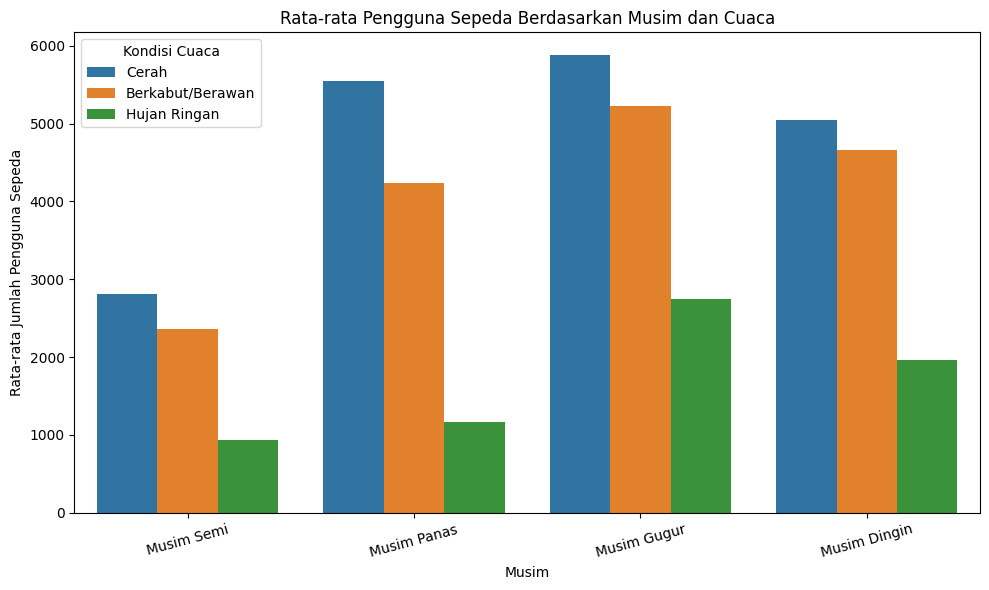

In [12]:
# Visualisasi kombinasi musim dan cuaca
plt.figure(figsize=(10, 6))
sns.barplot(x='season_label', y='cnt', hue='weather_label', data=season_weather_groups)
plt.title('Rata-rata Pengguna Sepeda Berdasarkan Musim dan Cuaca')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.legend(title="Kondisi Cuaca")
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig('global_season_weather_impact.png')
plt.show()

Berdasarkan bar chart di atas, dapat disimpulkan bahwa cuaca dan musim merupakan faktor penting yang memengaruhi penggunaan jasa penyewaan sepeda. Cuaca cerah dan musim gugur menunjukkan tingkat penggunaan sepeda yang paling tinggi dibandingkan kondisi lainnya. Hal ini mengindikasikan bahwa pengguna lebih cenderung menyewa sepeda saat cuaca mendukung dan suhu lebih nyaman, seperti pada musim gugur yang umumnya memiliki udara sejuk dan kondisi yang stabil.

### Pertanyaan 2:
Bila melihat berdasarkan jam, apakah ada pola tertentu? Seperti jam berapa terpadat dan terlonggar?

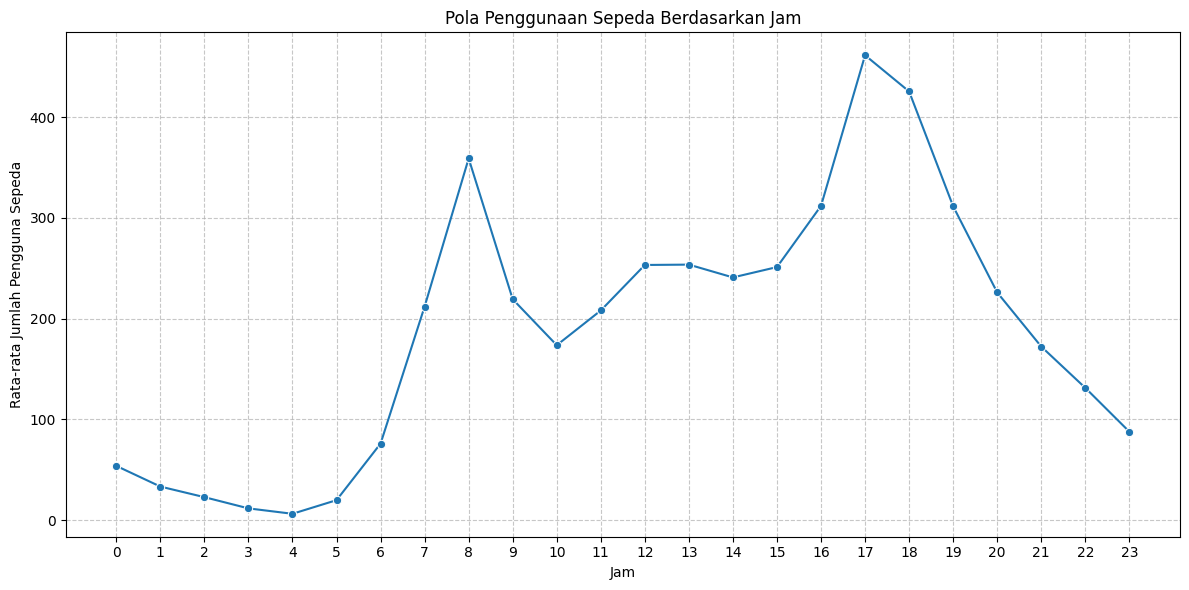

In [15]:
# Visualisasi
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=avg_cnt_by_hour, marker='o')
plt.title('Pola Penggunaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('hourly_pattern.png')
plt.show()

Berdasarkan grafik line chart ini ternyata jumlah terpadat dalam pengguna sepeda ialah jam 17.00 atau jam 5 sore

**Insight:**
Bila kita melihat dari 2 Chart diatas kita dapat menyimpulkan sebagai berikut:
1. Kondisi Cuaca dan musim merupakan faktor penting untuk pelaku usaha penyewaan sepeda. Bila kita melihat Bar Chart di atas bahwa Cuaca cerah  dan musim gugur memiliki hasil tertinggi jika dibandingkan dengan yang lain 
2. Berdasarkan Line Chart di atas jam teramai dan terlonggar dalam penyewaan sepeda ialah jam 17 dan jam 4 pagi.


***Conclusion***

Setelah analisis dilakukan saya melihat bahwa cuaca, musim, dan waktu dalam sehari memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda. Cuaca cerah meningkatkan jumlah penyewaan, sementara kondisi hujan mengurangi minat pengguna. Selain itu, musim gugur menjadi periode dengan jumlah penyewaan tertinggi, kemungkinan karena suhu yang lebih nyaman dan kondisi cuaca yang stabil dibandingkan musim lainnya.Dari segi pola penggunaan berdasarkan waktu, terdapat dua lonjakan utama pada pukul 08:00 pagi dan 17:00–18:00 sore, yang kemungkinan besar berkaitan dengan jam berangkat kerja dan aktivitas setelah jam kantor, seperti pulang kerja atau rekreasi.